In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class GridWorld(object):
    def __init__(self, m, e, n,cord,st_cost,stock,tr_cost,lead_time,t_cy):
        #self.cord = np.zeros((m,e))
        #self.graph = np.zeros((n,n))
        t=np.zeros((m,e))
        for i in range(m):
          for j in range(e):
            if cord[i][j] >= 1:
              t[i][j]= 1
        self.alpha = t

        self.lead_time = lead_time #lead times matrix
        self.t_cy = t_cy          # order cycle
        #self.graph = graph         # adjacency matrix
        self.cord = cord           # echelon matrix
        self.st_cost = st_cost     # storage cost
        self.stock = stock         # demand forecasted A.K.A target
        self.tr_cost = tr_cost     # transportation cost

        self.m = m
        self.e = e
        self.n = n

        self.stateSpace = [(i+1) for i in range(n)]
        del self.stateSpace[0]
        self.stateSpacePlus = [(i+1) for i in range(n)]
       # self.actionSpace = {'U': -self.m, 'D': self.m,'L': -1, 'R': 1}
        self.possibleActions = ['N','D','I']
        # dict with magic squares and resulting squares
        #self.addMagicSquares(magicSquares)
        self.agentPosition = (n)

    def isTerminalState(self, state):
        return state in self.stateSpacePlus and state not in self.stateSpace

    # def addMagicSquares(self, magicSquares):
    #     self.magicSquares = magicSquares
    #     i = 2
    #     for square in self.magicSquares:
    #         x = square // self.m
    #         y = square % self.n
    #         self.grid[x][y] = i
    #         i += 1
    #         x = magicSquares[square] // self.m
    #         y = magicSquares[square] % self.n
    #         self.grid[x][y] = i
    #         i += 1

    def getAgentRowAndColumn(self):
        for i in range(m):
          for j in range(e):
            if self.cord[i][j] == self.agentPosition:
              return i,j

    def setState(self, state):
        # x, y = self.getAgentRowAndColumn()
        # self.grid[x][y] = 0
        self.agentPosition = state
        # x, y = self.getAgentRowAndColumn()
        # self.grid[x][y] = 1

    # def offGridMove(self, newState, oldState):
    #     # if we move into a row not in the grid
    #     if newState not in self.stateSpacePlus:
    #         return True
    #     # if we're trying to wrap around to next row
    #     elif oldState % self.m == 0 and newState  % self.m == self.m - 1:
    #         return True
    #     elif oldState % self.m == self.m - 1 and newState % self.m == 0:
    #         return True
    #     else:
    #         return False
    # def cords(self , grid):
    #   for i in range(m):
    #     for j in range(e):
    #       if grid[i][j] == self.agentPosition:
    #         return i,j

    def update(self,action,X,Y):
      if(action == 'I'):
        self.alpha[X][Y]= np.random.uniform( self.alpha[X][Y] , 1)
      elif(action == 'D'):
        self.alpha[X][Y]= np.random.uniform( 0 , self.alpha[X][Y])
      else:
        self.alpha[X][Y]= self.alpha[X][Y]

    def reward_compute(self,X,Y):
      import sys
      max_int = sys.maxsize
      t1 = self.st_cost[X][Y]*(self.stock[X][Y] * self.alpha[X][Y])*self.t_cy
      #a1 = 1 - self.alpha[X][Y]
      t2 = self.tr_cost[X][Y]*((1 - self.alpha[X][Y])*self.stock[X][Y])
      t3 = self.st_cost[X][Y]*((1 - self.alpha[X][Y])*self.stock[X][Y])*(self.t_cy - self.lead_time[X][Y])
      result = 100000000 - (t1+t2+t3)
      return result

    def step(self, action):
        agentX, agentY = self.getAgentRowAndColumn()
        #update values
        resultingState = self.agentPosition - 1

       # i = cords(grid)
        self.update(action , agentX,agentY)




        reward = self.reward_compute(agentX,agentY)
        # if resultingState in self.magicSquares.keys():
        #     resultingState = magicSquares[resultingState]

        #reward = -1 if not self.isTerminalState(resultingState) else 0
        if not self.isTerminalState(resultingState):
            self.setState(resultingState)
            return resultingState, reward, \
                   self.isTerminalState(resultingState), None
        else:
            return self.agentPosition, reward, \
                   self.isTerminalState(resultingState), None



    def reset(self):
        self.agentPosition = self.n-1
        # t=np.zeros((m,e))
        # for i in range(m):
        #   for j in range(e):
        #     if cord[i][j] >= 1:
        #       t[i][j]= 1
        # self.alpha = t
        #self.grid = np.zeros((self.m,self.n))
       # self.addMagicSquares(self.magicSquares)
        return self.agentPosition

    def render(self):
        print('------------------------------------------')
        for row in self.alpha:
            for col in row:
                print(col,"\t")
            print('\n')
        print('------------------------------------------')

    def actionSpaceSample(self):
        return np.random.choice(self.possibleActions)


In [ ]:
def maxAction(Q, state, actions):
    values = np.array([Q[state,a] for a in actions])
    action = np.argmax(values)
    return actions[action]

In [ ]:
import sys
min_int = -sys.maxsize - 1
print(min_int)

-9223372036854775808


In [ ]:
if __name__ == '__main__':
    # map magic squares to their connecting square

    #environment details
    m=4
    e=3
    n=7
    cord = [[4,0,0],[5,2,1],[6,3,0],[7,0,0]]
    st_cost = [[5,6,4,8],[0,10,12,0],[0,9,0,0]]
    tr_cost = [[4,3,5,2],[0,5,6,0],[0,0,0,0]]
    stock = [[1000,2000,1500,3000],[0,8000,7000,0],[0,11000,0,0]]
    lead_time = [[10,12,9,14],[0,13,18,0],[0,0,0,0]]
    t_cy = 30
    #setup
    env = GridWorld(m,e,n,cord,st_cost,stock,tr_cost,lead_time,t_cy)

    # model hyperparameters
    ALPHA = 0.1
    GAMMA = 1.0
    EPS = 1.0

    Q = {}
    for state in env.stateSpacePlus:
        for action in env.possibleActions:
            Q[state, action] = 0

    numGames = 100
    totalRewards = np.zeros(numGames)
    for i in range(numGames):
        if i % 5000 == 0:
            print('starting game ', i)
        done = False
        epRewards = 0
        observation = env.reset()
        while not done:
            rand = np.random.random()
            action = maxAction(Q,observation, env.possibleActions) if rand < (1-EPS) \
                                                    else env.actionSpaceSample()
            #print(i,":",action)
            observation_, reward, done, info = env.step(action)
            epRewards += reward

            action_ = maxAction(Q, observation_, env.possibleActions)
            Q[observation,action] = Q[observation,action] + ALPHA*(reward + \
                        GAMMA*Q[observation_,action_] - Q[observation,action])
            observation = observation_
            # if(done):
            #   env.render()
        if EPS - 10 / numGames > 0:
            EPS -= 10 / numGames
        else:
            EPS = 0
        totalRewards[i] = epRewards
        print(i,":",epRewards)



starting game  0
0 : 494480000.0
1 : 494480000.0
2 : 494480000.0
3 : 494502885.2095297
4 : 494502885.2095297
5 : 494651650.1764871
6 : 494651650.1764871
7 : 494651650.1764871
8 : 494655130.7231203
9 : 494655130.7231203
10 : 494655130.7231203
11 : 494655130.7231203
12 : 494655130.7231203
13 : 494655130.7231203
14 : 494655130.7231203
15 : 494655130.7231203
16 : 494655130.7231203
17 : 494655130.7231203
18 : 494655130.7231203
19 : 494655130.7231203
20 : 494655130.7231203
21 : 494655130.7231203
22 : 494655130.7231203
23 : 494655130.7231203
24 : 494655130.7231203
25 : 494655130.7231203
26 : 494655130.7231203
27 : 494655130.7231203
28 : 494655130.7231203
29 : 494655130.7231203
30 : 494655130.7231203
31 : 494655130.7231203
32 : 494655130.7231203
33 : 494655130.7231203
34 : 494655130.7231203
35 : 494655130.7231203
36 : 494655130.7231203
37 : 494655130.7231203
38 : 494655130.7231203
39 : 494655130.7231203
40 : 494655130.7231203
41 : 494655130.7231203
42 : 494655130.7231203
43 : 494655130.7231203

In [ ]:
print(Q)

{(1, 'D'): -9223372036854775808, (1, 'N'): -9223372036854775808, (1, 'I'): -9223372036854775808, (2, 'D'): -9.223372036864498e+18, (2, 'N'): -9.223372036864545e+18, (2, 'I'): -9.22337203686454e+18, (3, 'D'): -9.22337203686547e+18, (3, 'N'): -9.223372036865522e+18, (3, 'I'): -9.2233720368656e+18, (4, 'D'): -9.223372036863631e+18, (4, 'N'): -9.223372036863576e+18, (4, 'I'): -9.223372036863728e+18, (5, 'D'): -9.223372036861571e+18, (5, 'N'): -9.223372036861719e+18, (5, 'I'): -9.223372036861633e+18, (6, 'D'): -9.223372036859818e+18, (6, 'N'): -9.223372036859685e+18, (6, 'I'): -9.223372036859742e+18, (7, 'D'): -9223372036854775808, (7, 'N'): -9223372036854775808, (7, 'I'): -9223372036854775808}


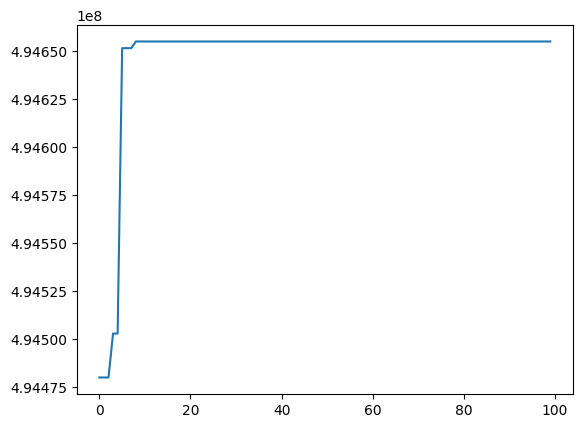

In [ ]:
plt.plot(totalRewards)
plt.show()

In [ ]:
print(env.alpha)

[[0.59425808 0.         0.        ]
 [0.13295655 0.16465352 1.        ]
 [0.00211357 0.84217234 0.        ]
 [1.         0.         0.        ]]


In [ ]:

for i in range(3):
  t = [np.random.uniform(-1, 1), np.random.uniform(-1, 1)]
  statespace.append(t)
#statesspace = np.reshape(statespace, (2,150))
print(np.shape(statespace))
print(statespace)

(306, 2)
[[1.4135990810669892, -0.2824817165897806], [1.2857822374088155, -0.7003558784384107], [2.8412761767693198, 0.6175505203126306], [-3.1299559512055866, -0.05530824574819371], [0.4131201961254467, -0.27094916069493813], [-0.5516047276739373, 0.8470339393629376], [-2.127058136869556, -0.08595165396318927], [1.1218052823214517, 0.4712634703801257], [0.09404465823206021, -0.43975522496421116], [1.226348233038526, -0.7002430751174267], [-0.7603447486721366, 0.24279091169273737], [1.604307779133343, -0.7399985739102037], [-1.9980689661095945, -0.8305754813150177], [2.8769812149577723, 0.5662265469282801], [2.1349845561832588, -0.8845188586752464], [0.38422280343294, -0.5874957386749569], [0.34486265182861686, 0.8982038448660381], [-1.4507485179200315, 0.1317866511821233], [-1.2591330257807438, -0.43815054733135117], [1.3736131993774405, -0.3274882561312875], [1.434797331768813, -0.4625246883256733], [0.19855944198169428, 0.9104372837115311], [-0.7346841431236886, 0.9435179663628384],

In [ ]:
cord = [[4,0,0],[5,2,1],[6,3,0],[7,0,0]]
t=np.zeros((4,3))
for i in range(4):
  for j in range(3):
    if cord[i][j] >= 1:
      t[i][j]= 1
result = []
result.append(t)
result.append(t)

In [ ]:
print(result)

[array([[1., 0., 0.],
       [1., 1., 1.],
       [1., 1., 0.],
       [1., 0., 0.]]), array([[1., 0., 0.],
       [1., 1., 1.],
       [1., 1., 0.],
       [1., 0., 0.]])]


In [ ]:
stateSpace = [(i+1) for i in range(5)]
del stateSpace[0]
stateSpacePlus = [(i+1) for i in range(5)]

In [ ]:
print(stateSpacePlus)

[1, 2, 3, 4, 5]
